# Stock price Prediction using LSTM

## 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib notebook

In [ ]:
pip install yfinance

## 2. Loading our Dataset

In [15]:
s = '2010-01-01'
e = '2022-1-31'
name = input("Enter a name: ")
df = yf.download(name,s,e)

Enter a name: MSFT
[*********************100%***********************]  1 of 1 completed


In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690727,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545330,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300468,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.461159,51197400


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,292.200012,297.109985,276.049988,296.369995,293.618744,85731500
2022-01-25,291.519989,294.989990,285.170013,288.489990,285.811890,72848600
2022-01-26,307.989990,308.500000,293.029999,296.709991,293.955566,90428900
2022-01-27,302.660004,307.299988,297.929993,299.839996,297.056549,53481300
2022-01-28,300.230011,308.480011,294.450012,308.260010,305.398407,49743700


In [18]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690727,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545330,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300468,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.461159,51197400


## 3. Dropping columns

In [19]:
df = df.drop(['Date','Adj Close'],axis=1)

In [20]:
df

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400
...,...,...,...,...,...
3035,292.200012,297.109985,276.049988,296.369995,85731500
3036,291.519989,294.989990,285.170013,288.489990,72848600
3037,307.989990,308.500000,293.029999,296.709991,90428900
3038,302.660004,307.299988,297.929993,299.839996,53481300


In [21]:
plt.plot(df.Close,c='orange')
plt.show()

### 4. Calculating and plotting Moving Average of 100 and 200 days

In [22]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3035    316.5437
3036    316.4103
3037    316.3659
3038    316.3529
3039    316.4337
Name: Close, Length: 3040, dtype: float64

In [23]:
plt.plot(df.Close)
plt.plot(ma100)
plt.show()

In [24]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3035    292.78020
3036    292.94310
3037    293.13420
3038    293.35545
3039    293.59925
Name: Close, Length: 3040, dtype: float64

<IPython.core.display.Javascript object>


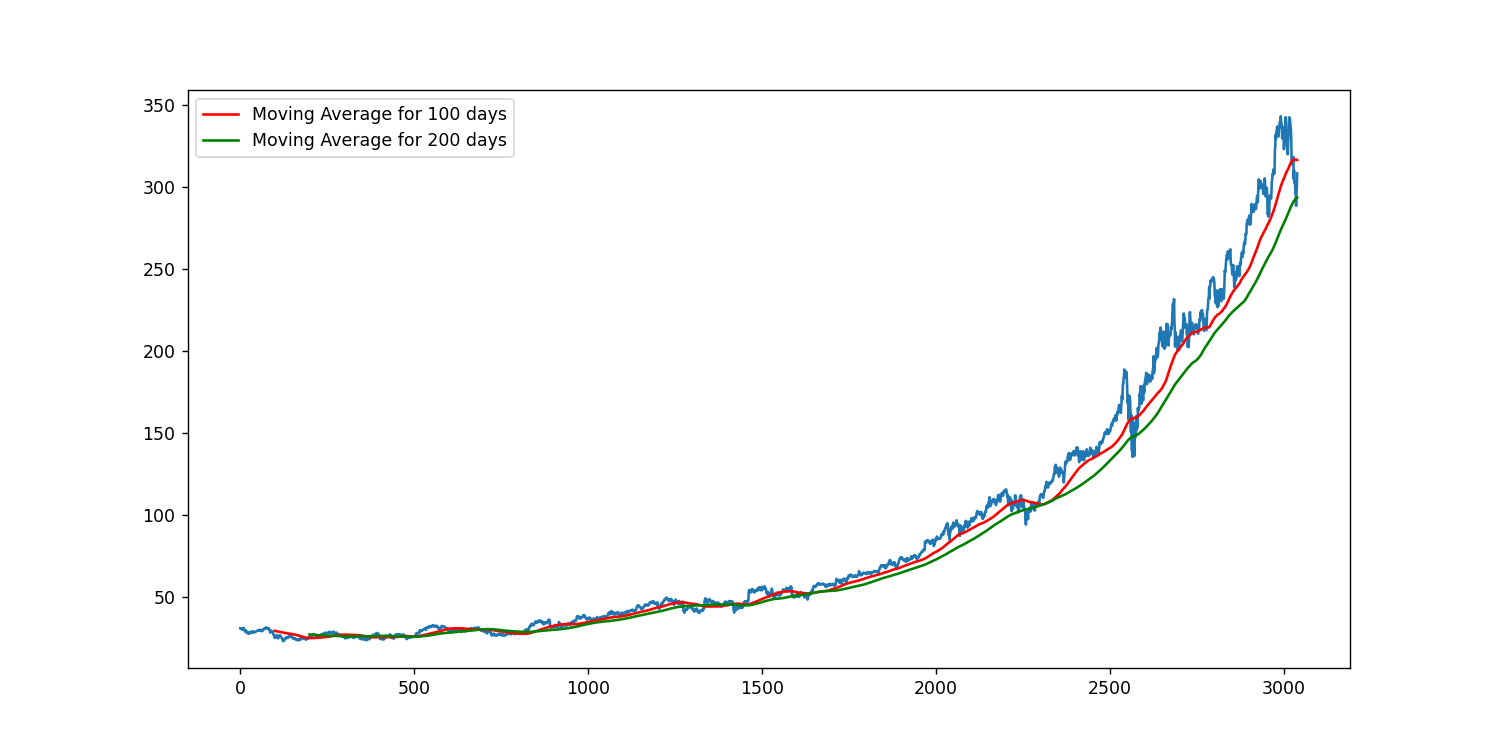

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='Moving Average for 100 days')
plt.plot(ma200,'g',label='Moving Average for 200 days')
plt.legend()
plt.show()

In [26]:
df.shape

(3040, 5)

## 5. Splitting and Scaling the date

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(2128, 1)
(912, 1)


In [29]:
data_train.head()

,Close
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [30]:
data_test.head()

,Close
2128,100.860001
2129,100.860001
2130,101.870003
2131,101.139999
2132,100.410004


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_training_array = scaler.fit_transform(data_train)
data_training_array

array([[0.09989936],
       [0.10002515],
       [0.09763463],
       ...,
       [0.97936589],
       [0.9865375 ],
       [0.97030699]])

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [34]:
x_train.shape

(2028, 100, 1)

## 6. LSTM Model

In [35]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
              input_shape = (x_train.shape[1],1)))  # If we work with open,and other factors we can include other factors as well
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation='relu',return_sequences=True,
              ))  
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation='relu',return_sequences=True,
              ))  
model.add(Dropout(0.4))


model.add(LSTM(units = 120,activation='relu'))  
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [70]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=5)
#batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
64/64 [==============================] - 34s 382ms/step - loss: 0.0021 - mae: 0.0327
Epoch 2/5
64/64 [==============================] - 21s 333ms/step - loss: 0.0020 - mae: 0.0321
Epoch 3/5
64/64 [==============================] - 20s 318ms/step - loss: 0.0022 - mae: 0.0334
Epoch 4/5
64/64 [==============================] - 22s 338ms/step - loss: 0.0022 - mae: 0.0332
Epoch 5/5
64/64 [==============================] - 18s 288ms/step - loss: 0.0021 - mae: 0.0320


In [71]:
model.save('keras_model.h5')

In [72]:
data_test.head()

,Close
2128,100.860001
2129,100.860001
2130,101.870003
2131,101.139999
2132,100.410004


In [73]:
past_100_days = data_train.tail(100)

In [74]:
past_100_days.shape

(100, 1)

In [75]:
data_train.tail(100)

,Close
2028,91.820000
2029,92.330002
2030,94.059998
2031,93.919998
2032,92.739998
...,...
2123,101.050003
2124,101.309998
2125,100.849998
2126,101.419998


In [76]:
final_df = past_100_days.append(data_test,ignore_index=True)

C:\Users\kpb13\AppData\Local\Temp\ipykernel_21476\1652558580.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test,ignore_index=True)


In [77]:
final_df.shape

(1012, 1)

In [78]:
input_data = scaler.fit_transform(final_df)

In [79]:
input_data.shape

(1012, 1)

In [80]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [81]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [82]:
x_test.shape

(912, 100, 1)

In [83]:
y_test.shape

(912,)

## 8. Making predictions

In [84]:
y_predicted = model.predict(x_test)

29/29 [==============================] - 3s 87ms/step


In [85]:
y_predicted.shape

(912, 1)

In [86]:
y_test

array([0.0614103 , 0.0614103 , 0.06532352, 0.06249515, 0.05966681,
       0.05184036, 0.05451376, 0.04854707, 0.05277023, 0.05269275,
       0.05811701, 0.05439753, 0.0571484 , 0.06257266, 0.06524602,
       0.06629214, 0.06574972, 0.07431229, 0.07911662, 0.07710191,
       0.08113133, 0.07791554, 0.07512592, 0.08237116, 0.08895777,
       0.0877567 , 0.10003875, 0.09535065, 0.08783417, 0.07888416,
       0.08163503, 0.08240991, 0.08740798, 0.08922898, 0.08957767,
       0.09248352, 0.09484695, 0.09554435, 0.09294847, 0.08988763,
       0.09511816, 0.0877567 , 0.08767919, 0.08744673, 0.08469586,
       0.08124759, 0.08543199, 0.08736922, 0.09062379, 0.09527314,
       0.0978303 , 0.10464935, 0.10437813, 0.10585045, 0.10344827,
       0.09097248, 0.0919411 , 0.08988763, 0.09442075, 0.10162727,
       0.10344827, 0.10809765, 0.1098799 , 0.10511429, 0.10925997,
       0.10340952, 0.11065478, 0.11332817, 0.11491669, 0.1140643 ,
       0.11224333, 0.11390935, 0.11375437, 0.1185587 , 0.11677

In [87]:
y_predicted

array([[0.08564502],
       [0.08665815],
       [0.08748817],
       [0.08812796],
       [0.08858322],
       [0.08885837],
       [0.08893615],
       [0.08880149],
       [0.08843471],
       [0.08783555],
       [0.08702446],
       [0.0860543 ],
       [0.08498463],
       [0.0838813 ],
       [0.08282505],
       [0.08189906],
       [0.08118011],
       [0.08072416],
       [0.08058697],
       [0.08082686],
       [0.08148029],
       [0.08256079],
       [0.08404742],
       [0.08588099],
       [0.08799058],
       [0.09031224],
       [0.09277992],
       [0.09535254],
       [0.09798799],
       [0.10061762],
       [0.10313795],
       [0.105441  ],
       [0.10742778],
       [0.10903823],
       [0.11025542],
       [0.11109696],
       [0.11161204],
       [0.11187264],
       [0.11195847],
       [0.11193638],
       [0.11184917],
       [0.11173509],
       [0.11160538],
       [0.11145508],
       [0.11127222],
       [0.11103802],
       [0.11072703],
       [0.110

In [88]:
scaler.scale_

array([0.00387447])

In [89]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

<IPython.core.display.Javascript object>


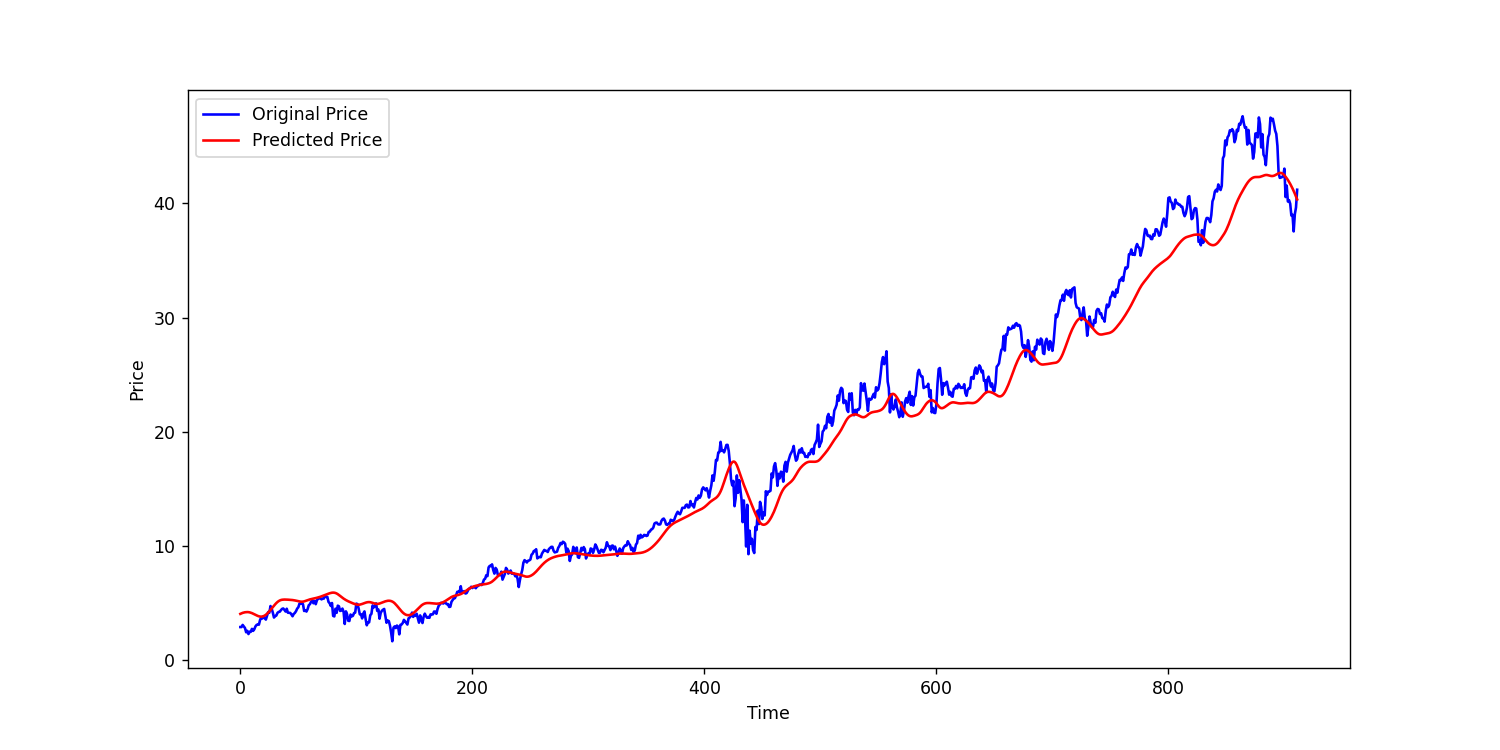

In [90]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## 9. Calculating Accuracy and Loss

In [91]:
mae = history.history['mae'][-1]

In [92]:
mae

0.03195660188794136

In [93]:
mse=history.history['loss'][-1]

In [94]:
mse

0.002093289978802204

In [95]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test,y_predicted)
mse

5.171378458223003

In [96]:
r2 = r2_score(y_test,y_predicted)

In [97]:
r2

0.9691791947757993

In [98]:
mae = mean_absolute_error(y_test,y_predicted)

In [99]:
mae

1.7169215255004266